In [1]:
import math
import numpy as np
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy import stats
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##Загрузите файл HR.csv в pandas dataframe

In [2]:
df= pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df['worker'] = df.index+1

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,worker
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,3
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  worker                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


##Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [16]:
df[[ 'satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,3.803054,201.050337,3.498233
std,0.248631,1.232592,49.943099,1.460136
min,0.090000,2.000000,96.000000,2.000000
25%,0.440000,3.000000,156.000000,3.000000
50%,0.640000,4.000000,200.000000,3.000000
75%,0.820000,5.000000,245.000000,4.000000
max,1.000000,7.000000,310.000000,10.000000


##Рассчитайте сколько сотрудников работает в каждом департаменте

In [17]:
df.groupby("department")["worker"].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: worker, dtype: int64

##Показать распределение сотрудников по зарплатам.

In [99]:
 df.groupby("salary")["worker"].count()

salary
high      1237
low       7316
medium    6446
Name: worker, dtype: int64

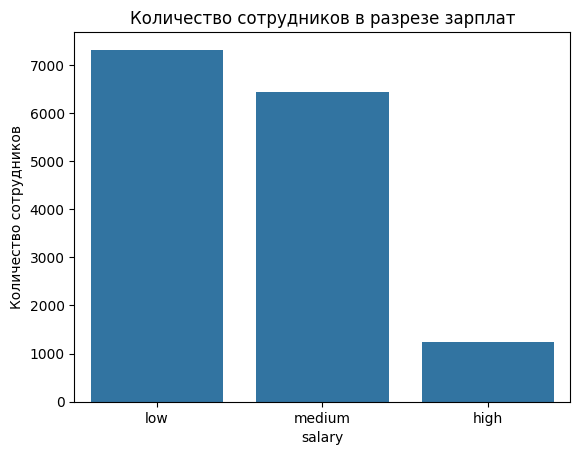

In [101]:
sns.countplot(data=df, x="salary")
plt.title("Количество сотрудников в разрезе зарплат")
plt.ylabel("Количество сотрудников")
plt.show()

##Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [137]:
 df.groupby(['department', 'salary']).agg({'worker':'count'})

worker
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

In [135]:
color_palette = {
    'high': 'red',
    'low': 'black',
    'medium': 'orange',

}

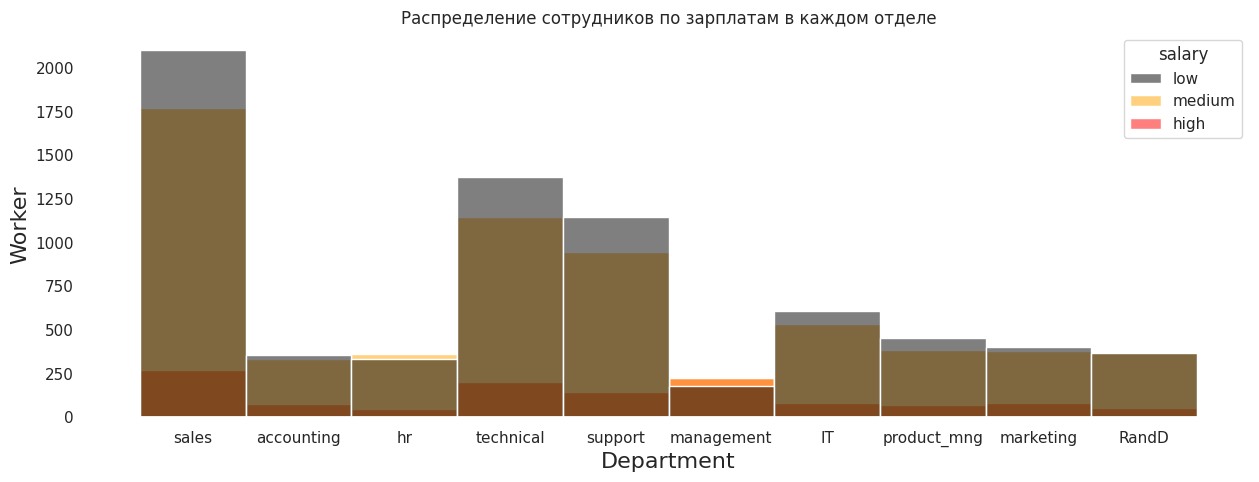

In [136]:
plt.figure(figsize=[15,5])
sns.set_style(rc = {'axes.facecolor': 'white'})

p =sns.histplot(df, x="department", hue="salary", palette=color_palette)
p.set_xlabel("Department", fontsize = 16)
p.set_ylabel("Worker", fontsize = 16)
plt.title("Распределение сотрудников по зарплатам в каждом отделе")
plt.show()

In [ ]:
'''
. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
'''

##Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [63]:
df_coor= df[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company',  'promotion_last_5years' ]].corr()

In [ ]:
#'Work_accident', 'left' - это категориальные переменные

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(df_coor, annot=True, cmap='Reds')
plt.title("Матрица корреляции")
plt.show()

In [ ]:
# 'average_montly_hours' and 'nummer of project'. 'nummer of project'.  and time spend company. - больше всего корреляция
#'satisfaction_level' and 'nummer of project'. time spend company. 'satisfaction_level' - меньше всего корреляция

## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
 '''
h0 - одинаковое
h1-различное
''''


In [65]:
obj_df = df.copy()

In [69]:
cleanup_nums = {"salary":     {"high": 3, "medium": 2, "low": 1}}

In [ ]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

In [79]:
obj_df = obj_df[['average_montly_hours', 'salary']]

In [ ]:
data1 = obj_df[obj_df["salary"] == 3]
data1


In [ ]:
data2 = obj_df[obj_df["salary"] == 1]
data2.info()

In [85]:
stat, p = st.mannwhitneyu(data1['average_montly_hours'], data2['average_montly_hours'])
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


##Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

In [ ]:
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

## Who left

In [171]:
data = df[df['left'] == 1]
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,worker
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,6500.439653
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,6266.484705
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,1.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,893.500000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,1786.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,12678.500000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,14999.000000


<Axes: ylabel='worker'>

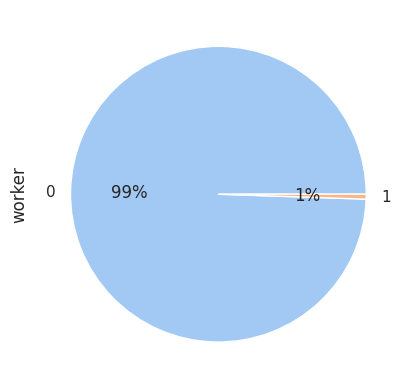

In [167]:
data.groupby("promotion_last_5years")["worker"].count().plot(kind='pie', y='worker', autopct='%1.0f%%', colors=colors)

In [ ]:
# 99% ушедших были без повышения, только 1% повысили ,но все равно ушли

In [169]:
data[['satisfaction_level','number_project']].mean()

satisfaction_level    0.440098
number_project        3.855503
dtype: float64

In [ ]:
data[['satisfaction_level','number_project']].describe()

##Who are working now

In [176]:
data4 = df[df['left'] == 0]
data4.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,worker
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251,7812.340742
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889,3453.947461
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000,2001.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000,4857.750000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000,7714.500000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000,10571.250000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000,14211.000000


<Axes: ylabel='worker'>

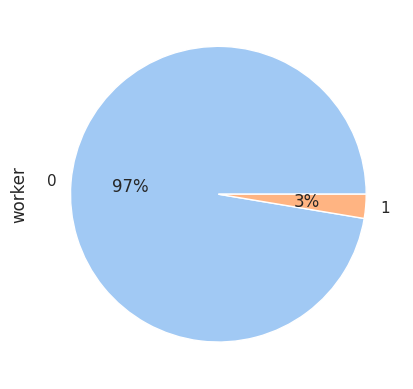

In [177]:
data4.groupby("promotion_last_5years")["worker"].count().plot(kind='pie', y='worker', autopct='%1.0f%%', colors=colors)

In [ ]:
# 97% до сиз пор без повышения, только 3% повысили

In [178]:
print (data4[['satisfaction_level','number_project']].mean())

print ('------------------------------------------------------')

print (data[['satisfaction_level','number_project']].mean())


satisfaction_level    0.666810
number_project        3.786664
dtype: float64
------------------------------------------------------
satisfaction_level    0.440098
number_project        3.855503
dtype: float64


In [ ]:
#У тех, кто ушел, удовлетвовернность была ниже, и по нагрузке было чуть больше

##Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [ ]:
list(df.columns)

In [217]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,worker
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,7500.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,4329.982679
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,3750.500000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7500.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,11249.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,14999.000000


In [187]:
X = df[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']]



In [188]:
y = df['left']

In [200]:
from sklearn.model_selection import train_test_split


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [202]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [203]:
lda = LinearDiscriminantAnalysis()

In [204]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [205]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [219]:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

In [208]:

from sklearn.metrics import accuracy_score

In [213]:
accuracy_score(y_test, lda.predict(X_test))

0.7562222222222222